In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import IsolationForest
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [2]:
# Load dataset
df = pd.read_csv("creditcard.csv")


In [3]:
# Check for missing values and drop them if any
df.dropna(inplace=True)

<ipython-input-4-428d48af0e3e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='coolwarm')


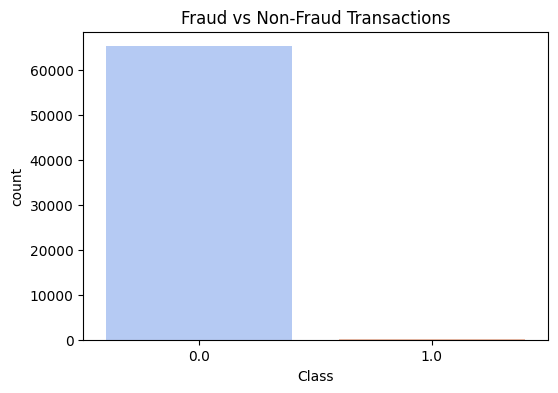

In [4]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df, palette='coolwarm')
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

In [5]:
# Feature Scaling and Data Preparation
X = df.drop(columns=['Class'])
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
# Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13057
         1.0       0.62      0.94      0.74        34

    accuracy                           1.00     13091
   macro avg       0.81      0.97      0.87     13091
weighted avg       1.00      1.00      1.00     13091



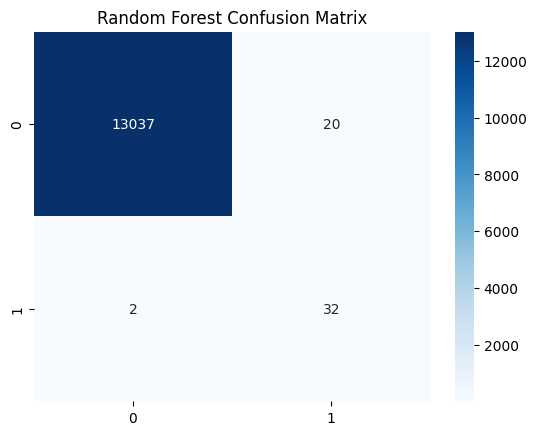

In [8]:
# Train and Evaluate Random Forest Classifier
rf = RandomForestClassifier(n_estimators=150, random_state=42, max_depth=10)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:24:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13057
         1.0       0.71      0.88      0.79        34

    accuracy                           1.00     13091
   macro avg       0.86      0.94      0.89     13091
weighted avg       1.00      1.00      1.00     13091



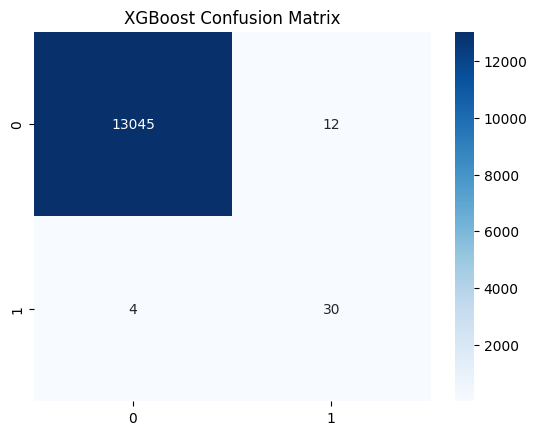

In [9]:
# Train and Evaluate XGBoost Classifier
xgb = XGBClassifier(n_estimators=150, learning_rate=0.05, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_res, y_train_res)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.show()

Isolation Forest Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13057
         1.0       0.00      0.00      0.00        34

    accuracy                           1.00     13091
   macro avg       0.50      0.50      0.50     13091
weighted avg       0.99      1.00      0.99     13091



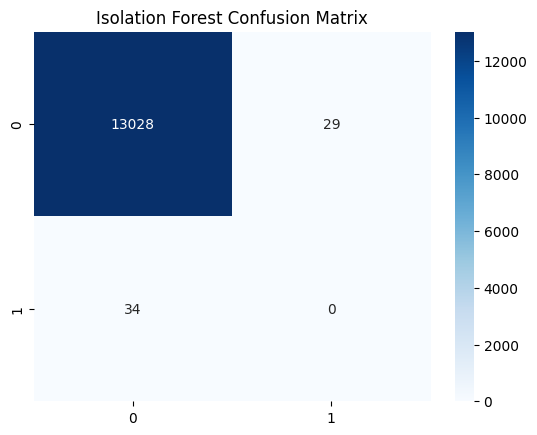

In [10]:
# Train and Evaluate Isolation Forest for Anomaly Detection
iso_forest = IsolationForest(contamination=0.005, random_state=42)
iso_forest.fit(X_train_res)
y_pred_anomaly = iso_forest.predict(X_test)
y_pred_anomaly = np.where(y_pred_anomaly == 1, 0, 1)  # Convert -1 to 1 for anomaly detection
print("Isolation Forest Classification Report:\n", classification_report(y_test, y_pred_anomaly))
conf_matrix_iso = confusion_matrix(y_test, y_pred_anomaly)
sns.heatmap(conf_matrix_iso, annot=True, fmt='d', cmap='Blues')
plt.title("Isolation Forest Confusion Matrix")
plt.show()

In [11]:
# Compare Models
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Isolation Forest Accuracy:", accuracy_score(y_test, y_pred_anomaly))


Random Forest Accuracy: 0.998319456114888
XGBoost Accuracy: 0.9987777862653732
Isolation Forest Accuracy: 0.9951875334199068


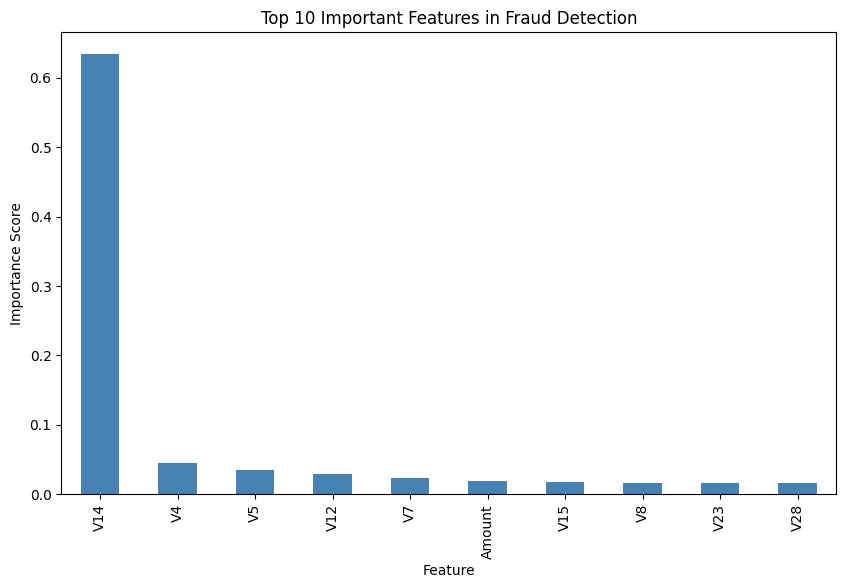

In [12]:
# Visualizing Feature Importance
feature_importance = pd.Series(xgb.feature_importances_, index=df.columns[:-1]).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importance[:10].plot(kind='bar', color='steelblue')
plt.title("Top 10 Important Features in Fraud Detection")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()